In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
folder_path = "/content/drive/My Drive/Chao Preply"
df1 = pd.read_csv(folder_path+"/dataset.csv")
df1.head(2)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [ ]:
df2 = pd.read_csv(folder_path+"/artists.csv", dtype={'artist_lastfm': 'string', 'country_lastfm': 'string', 'tags_lastfm': 'string'})
df2.head(2)

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False


Note:<br>
mb = MusicBrainz (popular music database)<br>
lastfm = Last.fm (music streaming platform)<br>
<br>

In [ ]:
df1.drop(columns=['Unnamed: 0', 'track_id'], axis=1, inplace=True)
df1.head(2)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [ ]:
df1.isnull().sum()

,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
df1.dropna(inplace=True)
df1.isnull().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
df1.shape[0]

113999

In [ ]:
df1.artists.nunique()

31437

In [ ]:
print(f"Proportion of unique artist combinations in this dataset: {round((df1.artists.nunique()/df1.shape[0])* 100, 2)}")

Proportion of unique artist combinations in this dataset: 27.58


In [ ]:
# drop rows where the "artists" column include a semi-colon
# gets rid of rows where we have combination/collaboration of 2+ artists
df1 = df1[~df1['artists'].str.contains(';')] # complement set
print(df1.shape) # removed +- 30k rows
df1.head(2)

(83924, 19)


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [ ]:
df1.artists.nunique() # 15k unique individual artists

15038

In [ ]:
df2.columns

Index(['mbid', 'artist_mb', 'artist_lastfm', 'country_mb', 'country_lastfm',
       'tags_mb', 'tags_lastfm', 'listeners_lastfm', 'scrobbles_lastfm',
       'ambiguous_artist'],
      dtype='object')

In [ ]:
# df2 with selected cols
df2 = df2[['artist_lastfm', 'country_mb','listeners_lastfm']]
df2.head(2)

,artist_lastfm,country_mb,listeners_lastfm
0,Coldplay,United Kingdom,5381567.0
1,Radiohead,United Kingdom,4732528.0


In [ ]:
df2.shape

(1466083, 3)

In [ ]:
df2 = df2.rename(columns={"artist_lastfm":"artists", 'country_mb':"country", "listeners_lastfm": "listeners"})
df2.head(2)

,artists,country,listeners
0,Coldplay,United Kingdom,5381567.0
1,Radiohead,United Kingdom,4732528.0


In [ ]:
df2.artists.nunique()

957811

In [ ]:
df2.isnull().sum()

,0
artists,479328
country,803715
listeners,479323


In [ ]:
df2 = df2.dropna(axis=0)
print(df2.shape)
df2.isnull().sum()

(438882, 3)


,0
artists,0
country,0
listeners,0


In [ ]:
df2.artists.nunique()

423829

In [ ]:
df2.dtypes

,0
artists,string[python]
country,object
listeners,float64


In [ ]:
country_counts = df2.country.value_counts()
country_counts

,count
country,
United States,112430
United Kingdom,49193
Germany,32837
Japan,27754
France,21801
...,...
Niue,1
"Bonaire, Sint Eustatius and Saba",1
Swaziland,1


In [ ]:
df2.columns

Index(['artists', 'country', 'listeners'], dtype='object')

In [ ]:
df2_temp = df2.sort_values(by=['artists', 'listeners'], ascending=False)

In [ ]:
# remove rows where the artists name is duplicated, ensuring we've gotten the best row for each artist (highest #listeners)
df2 = df2_temp.drop_duplicates(subset='artists', keep='first')
print(df2.shape)
df2.artists.nunique()

(423829, 3)


423829

In [ ]:
# get list of all artist names
artists_df2 = df2['artists'].tolist()
len(artists_df2)

423829

In [ ]:
df1.head(2)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


In [ ]:
df1_temp = df1.sort_values(by=['artists', 'popularity'], ascending=False)

In [ ]:
df1_temp.iloc[10000:10030,[0,3]]

,artists,popularity
38385,The Smith Street Band,31
38392,The Smith Street Band,31
38436,The Smith Street Band,30
38485,The Smith Street Band,29
38543,The Smith Street Band,29
38588,The Smith Street Band,28
38596,The Smith Street Band,28
38637,The Smith Street Band,28
38645,The Smith Street Band,27
38684,The Smith Street Band,27


In [ ]:
# keep highest popularity track per unique artist
df1 = df1_temp.drop_duplicates(subset='artists', keep='first')
df1.shape

(15038, 19)

In [ ]:
artists_df1 = df1['artists'].tolist()
len(artists_df1)

15038

In [ ]:
dfs = [df1,df2]
for d in dfs:
    d.loc[:,'artists'] = d['artists'].str.lower()

In [ ]:
df1.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [ ]:
df2.columns

Index(['artists', 'country', 'listeners'], dtype='object')

# Combining DF1 and DF2

In [ ]:
df12 = df1.merge(df2, how='inner', on='artists')
df12_copy = df12.copy()
df12

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,listeners
0,黃小琥,簡單不簡單,沒那麽簡單,56,310133,False,0.334,0.431,6,-5.861,1,0.0347,0.672000,0.000000,0.1010,0.2120,201.701,3,mandopop,Taiwan,4051.0
1,黃妃,非常妃,恨世生,25,155893,False,0.551,0.849,4,-1.784,0,0.0302,0.134000,0.000043,0.0597,0.7390,124.957,4,mandopop,Taiwan,318.0
2,黃仲崑,經典復刻21黃仲崑,牽掛,27,162293,False,0.464,0.512,4,-8.662,1,0.0282,0.509000,0.000063,0.4890,0.3360,77.184,4,mandopop,Taiwan,90.0
3,須田景凪,porte,veil,63,209636,False,0.559,0.873,0,-4.401,0,0.0543,0.028100,0.000000,0.1850,0.7970,150.055,4,j-pop,Japan,86.0
4,陶晶瑩,愛缺,太委屈,54,291306,False,0.664,0.420,11,-9.589,1,0.0269,0.786000,0.000000,0.1220,0.3190,110.042,4,mandopop,Taiwan,1981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,10cc,The Original Soundtrack,I'm Not In Love,71,366640,False,0.404,0.523,4,-15.700,1,0.0575,0.685000,0.000498,0.2820,0.1640,133.738,4,blues,United Kingdom,721943.0
8216,10-feet,VANDALIZE,SHOES,34,137893,False,0.517,0.981,9,-1.222,1,0.1100,0.069000,0.000000,0.0610,0.6540,124.821,4,j-rock,Japan,23767.0
8217,10 years,Feeding The Wolves (Deluxe Version),Fix Me,60,215840,False,0.448,0.840,1,-3.939,0,0.0362,0.001200,0.000000,0.0891,0.2340,157.975,4,grunge,United States,581485.0
8218,04 limited sazabys,eureka,Horizon,32,113573,False,0.420,0.994,8,-2.576,1,0.2170,0.000807,0.151000,0.2240,0.0582,112.643,4,j-rock,Japan,4229.0


In [ ]:
df12.isnull().sum()

,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [ ]:
df12.dtypes

,0
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64
loudness,float64


In [ ]:
df12.track_genre.nunique(), df12.country.nunique()

(113, 96)

In [ ]:
# encode track_genre and country
df12 = pd.get_dummies(df12, columns=['track_genre', 'country'], drop_first=True)
df12.shape

(8220, 226)

In [ ]:
df12.head(2)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,listeners,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,country_Antigua and Barbuda,country_Argentina,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Barbados,country_Belgium,country_Benin,country_Bermuda,country_Brazil,country_British Virgin Islands,country_Bulgaria,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Czech Republic,country_Denmark,country_Dominican Republic,country_East Germany,country_Egypt,country_Estonia,country_Ethiopia,country_Europe,country_Finland,country_France,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Kenya,country_Latvia,country_Lithuania,country_Macedonia,country_Malaysia,country_Mali,country_Malta,country_Mexico,country_Moldova,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Samoa,country_Senegal,country_Serbia,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Uruguay,countr

#### Building Model to Predict Popularity

In [ ]:
# X = df12.drop(columns=['artists', 'album_name', 'track_name', 'popularity'], axis=1)
# X.head(2)

In [ ]:
# y = df12['popularity']

In [ ]:
# df12['popularity'].min(), df12['popularity'].max()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# X_train.shape

In [ ]:
# apply standardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# X_train

In [ ]:
# X_test

Linear Regression

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [ ]:
# y_pred = lr.predict(X_test)
# y_pred

In [ ]:
# evaluation
# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = root_mean_squared_error(y_test,y_pred)
# r2 = r2_score(y_test,y_pred)
# print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR-squared: {r2}")

#### Random Forest Regression

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# X_train.shape

In [ ]:
# X_train

In [ ]:
# X_test

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

In [ ]:
# y_pred = rf.predict(X_test)
# y_pred

In [ ]:
# evaluation
# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = root_mean_squared_error(y_test,y_pred)
# r2 = r2_score(y_test,y_pred)
# print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR-squared: {r2}")

#### Random Forest Regression (with Standard Scaler)



In [ ]:
# Random Forest Regression (with Standard Scaler)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
# X_train.shape

# # apply standardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# # evaluation
# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# rmse = root_mean_squared_error(y_test,y_pred)
# r2 = r2_score(y_test,y_pred)
# print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR-squared: {r2}")

# IQR method

In [ ]:

# Step 1: Calculate Q1, Q3, and IQR
Q1 = df12['popularity'].quantile(0.25)
Q3 = df12['popularity'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df12[(df12['popularity'] < lower_bound) | (df12['popularity'] > upper_bound)]

# Optional: Remove outliers
df_cleaned = df12[(df12['popularity'] >= lower_bound) & (df12['popularity'] <= upper_bound)]

print("Outliers:")
outliers # no outliers

Outliers:


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,listeners,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,country_Antigua and Barbuda,country_Argentina,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Barbados,country_Belgium,country_Benin,country_Bermuda,country_Brazil,country_British Virgin Islands,country_Bulgaria,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Czech Republic,country_Denmark,country_Dominican Republic,country_East Germany,country_Egypt,country_Estonia,country_Ethiopia,country_Europe,country_Finland,country_France,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Kenya,country_Latvia,country_Lithuania,country_Macedonia,country_Malaysia,country_Mali,country_Malta,country_Mexico,country_Moldova,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Samoa,country_Senegal,country_Serbia,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Uruguay,countr

In [ ]:
df12.shape

(8220, 226)

In [ ]:
# X_train.shape

In [ ]:
# objective: if we do feature selection, can we improve R-squared value?
# from sklearn.feature_selection import SelectKBest, f_regression

# for i in range(20,219,20):

#   selector = SelectKBest(score_func=f_regression, k=i)
#   X_train_selected = selector.fit_transform(X_train, y_train)
#   X_test_selected = selector.transform(X_test)

#   model = LinearRegression()
#   model.fit(X_train_selected, y_train)

#   print(f"R² for {i} selected features: \n{model.score(X_test_selected, y_test)}\n\n")

In [ ]:
df12.head() # version with dummies (one-hot encoded)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,listeners,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,country_Antigua and Barbuda,country_Argentina,country_Australia,country_Austria,country_Azerbaijan,country_Bangladesh,country_Barbados,country_Belgium,country_Benin,country_Bermuda,country_Brazil,country_British Virgin Islands,country_Bulgaria,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Czech Republic,country_Denmark,country_Dominican Republic,country_East Germany,country_Egypt,country_Estonia,country_Ethiopia,country_Europe,country_Finland,country_France,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Guatemala,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Ivory Coast,country_Jamaica,country_Japan,country_Kenya,country_Latvia,country_Lithuania,country_Macedonia,country_Malaysia,country_Mali,country_Malta,country_Mexico,country_Moldova,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russia,country_Samoa,country_Senegal,country_Serbia,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Ukraine,country_United Kingdom,country_United States,country_Uruguay,countr

### df12_new created via inner merge of df1 and df2

In [ ]:
df12_new = df1.merge(df2, how='inner', on='artists')
df12_new.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,listeners
0,黃小琥,簡單不簡單,沒那麽簡單,56,310133,False,0.334,0.431,6,-5.861,1,0.0347,0.6720,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,4051.0
1,黃妃,非常妃,恨世生,25,155893,False,0.551,0.849,4,-1.784,0,0.0302,0.1340,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,318.0
2,黃仲崑,經典復刻21黃仲崑,牽掛,27,162293,False,0.464,0.512,4,-8.662,1,0.0282,0.5090,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,90.0
3,須田景凪,porte,veil,63,209636,False,0.559,0.873,0,-4.401,0,0.0543,0.0281,0.000000,0.1850,0.797,150.055,4,j-pop,Japan,86.0
4,陶晶瑩,愛缺,太委屈,54,291306,False,0.664,0.420,11,-9.589,1,0.0269,0.7860,0.000000,0.1220,0.319,110.042,4,mandopop,Taiwan,1981.0


## Categorise track_genre


In [ ]:
# checking if any cleaning needed
print(df12_new['track_genre'].nunique())
df12_new['track_genre'].unique()

113


array(['mandopop', 'j-pop', 'cantopop', 'singer-songwriter', 'j-idol',
       'anime', 'romance', 'punk', 'heavy-metal', 'emo', 'metal',
       'turkish', 'dub', 'folk', 'j-rock', 'ska', 'swedish', 'ambient',
       'latino', 'synth-pop', 'funk', 'punk-rock', 'minimal-techno',
       'spanish', 'tango', 'idm', 'party', 'progressive-house',
       'power-pop', 'sad', 'chill', 'industrial', 'goth', 'rock-n-roll',
       'iranian', 'garage', 'acoustic', 'grunge', 'death-metal', 'k-pop',
       'alt-rock', 'dance', 'chicago-house', 'grindcore', 'electronic',
       'hardcore', 'indie-pop', 'metalcore', 'deep-house', 'rock', 'mpb',
       'sertanejo', 'brazil', 'samba', 'hardstyle', 'pop-film', 'techno',
       'latin', 'disco', 'club', 'drum-and-bass', 'trip-hop', 'pagode',
       'hard-rock', 'german', 'kids', 'blues', 'trance', 'salsa', 'malay',
       'french', 'hip-hop', 'bluegrass', 'guitar', 'classical', 'edm',
       'new-age', 'r-n-b', 'black-metal', 'comedy', 'disney', 'dancehall'

_____

In [ ]:
track_genres = ['mandopop', 'j-pop', 'cantopop', 'singer-songwriter', 'j-idol',
                'anime', 'romance', 'punk', 'heavy-metal', 'emo', 'metal',
                'turkish', 'dub', 'folk', 'j-rock', 'ska', 'swedish', 'ambient',
                'latino', 'synth-pop', 'funk', 'punk-rock', 'minimal-techno',
                'spanish', 'tango', 'idm', 'party', 'progressive-house',
                'power-pop', 'sad', 'chill', 'industrial', 'goth', 'rock-n-roll',
                'iranian', 'garage', 'acoustic', 'grunge', 'death-metal', 'k-pop',
                'alt-rock', 'dance', 'chicago-house', 'grindcore', 'electronic',
                'hardcore', 'indie-pop', 'metalcore', 'deep-house', 'rock', 'mpb',
                'sertanejo', 'brazil', 'samba', 'hardstyle', 'pop-film', 'techno',
                'latin', 'disco', 'club', 'drum-and-bass', 'trip-hop', 'pagode',
                'hard-rock', 'german', 'kids', 'blues', 'trance', 'salsa', 'malay',
                'french', 'hip-hop', 'bluegrass', 'guitar', 'classical', 'edm',
                'new-age', 'r-n-b', 'black-metal', 'comedy', 'disney', 'dancehall',
                'reggae', 'psych-rock', 'honky-tonk', 'afrobeat', 'opera',
                'rockabilly', 'show-tunes', 'children', 'piano', 'happy',
                'country', 'pop', 'jazz', 'alternative', 'british', 'gospel',
                'electro', 'detroit-techno', 'forro', 'groove', 'j-dance', 'soul',
                'world-music', 'breakbeat', 'house', 'sleep', 'indie', 'study',
                'indian', 'dubstep', 'reggaeton']

categories = {
    "Pop": ['pop', 'j-dance','mandopop', 'cantopop', 'j-pop', 'k-pop', 'singer-songwriter', 'indie-pop', 'power-pop', 'pop-film', 'alternative', 'indie', 'british', 'synth-pop'],
    "Rock": ['ska','punk', 'heavy-metal', 'alt-rock', 'j-rock', 'punk-rock', 'grunge', 'death-metal', 'goth', 'hard-rock', 'metalcore', 'rock-n-roll', 'psych-rock', 'rock', 'garage', 'acoustic', 'rockabilly', 'emo', 'metal'],
    "Electronic": ['idm', 'electronic', 'hardcore','edm', 'minimal-techno', 'progressive-house', 'chicago-house', 'deep-house', 'techno', 'detroit-techno', 'house', 'dubstep', 'drum-and-bass', 'trance', 'ambient', 'electro', 'industrial', 'breakbeat', 'dance', 'hardstyle'],
    "Dance & Party": ['disco', 'dub', 'funk', 'groove', 'party', 'club', 'dancehall'],
    "Traditional & Regional": ['latin','tango', 'mpb', 'sertanejo', 'samba', 'pagode', 'salsa', 'afrobeat', 'forro', 'iranian', 'turkish', 'indian', 'malay', 'latino', 'spanish', 'french', 'german', 'swedish', 'brazil', 'world-music'],
    "Classical & Art Music": ['classical', 'opera', 'piano', 'show-tunes'],
    "Soul & R&B": ['soul', 'r-n-b', 'gospel', 'blues'],
    "Country & Folk": ['country', 'folk', 'bluegrass', 'honky-tonk', 'guitar'],
    "Hip-Hop & Reggae": ['hip-hop', 'reggae', 'reggaeton', 'afrobeat'],
    "Movies & Children": ['disney', 'comedy', 'children', 'kids', 'pop-film'],
    "Mood-based Music": ['sad', 'chill', 'happy', 'sleep', 'study', 'romance'],
    "Miscellaneous": ['j-idol', 'anime', 'new-age', 'black-metal', 'trip-hop', 'grindcore', 'jazz']
}

# Using dictionary comprehension to organize the genres into categories
genre_classification = {genre: category for category, genres in categories.items() for genre in genres}

# Print result
genre_classification

{'pop': 'Pop',
 'j-dance': 'Pop',
 'mandopop': 'Pop',
 'cantopop': 'Pop',
 'j-pop': 'Pop',
 'k-pop': 'Pop',
 'singer-songwriter': 'Pop',
 'indie-pop': 'Pop',
 'power-pop': 'Pop',
 'pop-film': 'Movies & Children',
 'alternative': 'Pop',
 'indie': 'Pop',
 'british': 'Pop',
 'synth-pop': 'Pop',
 'ska': 'Rock',
 'punk': 'Rock',
 'heavy-metal': 'Rock',
 'alt-rock': 'Rock',
 'j-rock': 'Rock',
 'punk-rock': 'Rock',
 'grunge': 'Rock',
 'death-metal': 'Rock',
 'goth': 'Rock',
 'hard-rock': 'Rock',
 'metalcore': 'Rock',
 'rock-n-roll': 'Rock',
 'psych-rock': 'Rock',
 'rock': 'Rock',
 'garage': 'Rock',
 'acoustic': 'Rock',
 'rockabilly': 'Rock',
 'emo': 'Rock',
 'metal': 'Rock',
 'idm': 'Electronic',
 'electronic': 'Electronic',
 'hardcore': 'Electronic',
 'edm': 'Electronic',
 'minimal-techno': 'Electronic',
 'progressive-house': 'Electronic',
 'chicago-house': 'Electronic',
 'deep-house': 'Electronic',
 'techno': 'Electronic',
 'detroit-techno': 'Electronic',
 'house': 'Electronic',
 'dubstep':

In [ ]:
# Calculate the number of categories
number_of_categories = len(categories)
number_of_categories

12

In [ ]:
# Flatten the list of genres from all categories
classified_genres = {genre for genres in categories.values() for genre in genres}
len(classified_genres) # taken care of all original genres

113

In [ ]:
# Add new column: genre_classification to df12_new

# Create a new column 'genre_classification' based on the 'track_genre' column
df12_new['genre_classification'] = df12_new['track_genre'].map(genre_classification)

df12_new.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,listeners,genre_classification
0,黃小琥,簡單不簡單,沒那麽簡單,56,310133,False,0.334,0.431,6,-5.861,1,0.0347,0.6720,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,4051.0,Pop
1,黃妃,非常妃,恨世生,25,155893,False,0.551,0.849,4,-1.784,0,0.0302,0.1340,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,318.0,Pop
2,黃仲崑,經典復刻21黃仲崑,牽掛,27,162293,False,0.464,0.512,4,-8.662,1,0.0282,0.5090,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,90.0,Pop
3,須田景凪,porte,veil,63,209636,False,0.559,0.873,0,-4.401,0,0.0543,0.0281,0.000000,0.1850,0.797,150.055,4,j-pop,Japan,86.0,Pop
4,陶晶瑩,愛缺,太委屈,54,291306,False,0.664,0.420,11,-9.589,1,0.0269,0.7860,0.000000,0.1220,0.319,110.042,4,mandopop,Taiwan,1981.0,Pop


In [ ]:
df12_new.genre_classification.isna().sum() # no missing values, every genre is classified

0

## Country to Continent

In [ ]:
# checking if any cleaning needed
df12_new['country'].unique()
# can create a new col which contains number assignment per unique continent
# (will preserve country info)

array(['Taiwan', 'Japan', 'China', 'United States', 'Singapore',
       'Malaysia', 'Russia', 'Soviet Union', 'Czech Republic', 'Turkey',
       'France', 'Sweden', 'Iceland', 'Brazil', 'Germany', 'Argentina',
       'Spain', 'United Kingdom', 'Denmark', 'Canada', 'Mexico',
       'Belgium', 'Philippines', 'Australia', 'Hungary', 'Norway',
       'India', 'Netherlands', 'Italy', 'South Korea', 'Switzerland',
       'Colombia', 'Greece', 'Dominican Republic', 'Chile', 'Austria',
       'Poland', 'Nigeria', 'Finland', 'Trinidad and Tobago', 'Ukraine',
       'Jamaica', 'Bangladesh', 'South Africa', 'Indonesia', 'Israel',
       'Nepal', 'Lithuania', 'Slovenia', 'Mali', 'Ivory Coast', 'Ireland',
       'New Zealand', 'Slovakia', 'Iran', 'Croatia', 'Estonia',
       'Macedonia', 'Thailand', 'Latvia', 'Costa Rica', 'Ghana',
       'Pakistan', 'Venezuela', 'Barbados', 'Panama', 'Cuba', 'Peru',
       'Azerbaijan', 'Georgia', 'Zambia', 'East Germany', 'Serbia',
       'Bulgaria', 'Senegal', '

In [ ]:
import requests

In [ ]:
def get_continent_from_api(country_name):
    url = f"https://restcountries.com/v3.1/name/{country_name}?fullText=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        continent = data[0].get("region", "Unknown")
        return continent
    else:
        return "Unknown"

def get_continents_for_list(countries):
    continents = []
    for country in countries:
        continent = get_continent_from_api(country)
        continents.append(continent)
    return continents

In [ ]:
countries = list(df12_new['country'].unique())
countries

['Taiwan',
 'Japan',
 'China',
 'United States',
 'Singapore',
 'Malaysia',
 'Russia',
 'Soviet Union',
 'Czech Republic',
 'Turkey',
 'France',
 'Sweden',
 'Iceland',
 'Brazil',
 'Germany',
 'Argentina',
 'Spain',
 'United Kingdom',
 'Denmark',
 'Canada',
 'Mexico',
 'Belgium',
 'Philippines',
 'Australia',
 'Hungary',
 'Norway',
 'India',
 'Netherlands',
 'Italy',
 'South Korea',
 'Switzerland',
 'Colombia',
 'Greece',
 'Dominican Republic',
 'Chile',
 'Austria',
 'Poland',
 'Nigeria',
 'Finland',
 'Trinidad and Tobago',
 'Ukraine',
 'Jamaica',
 'Bangladesh',
 'South Africa',
 'Indonesia',
 'Israel',
 'Nepal',
 'Lithuania',
 'Slovenia',
 'Mali',
 'Ivory Coast',
 'Ireland',
 'New Zealand',
 'Slovakia',
 'Iran',
 'Croatia',
 'Estonia',
 'Macedonia',
 'Thailand',
 'Latvia',
 'Costa Rica',
 'Ghana',
 'Pakistan',
 'Venezuela',
 'Barbados',
 'Panama',
 'Cuba',
 'Peru',
 'Azerbaijan',
 'Georgia',
 'Zambia',
 'East Germany',
 'Serbia',
 'Bulgaria',
 'Senegal',
 'Uruguay',
 'Ethiopia',
 'Port

In [ ]:
continents = get_continents_for_list(countries)
continents

['Asia',
 'Asia',
 'Asia',
 'Americas',
 'Asia',
 'Asia',
 'Europe',
 'Unknown',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'Europe',
 'Americas',
 'Europe',
 'Americas',
 'Europe',
 'Europe',
 'Europe',
 'Americas',
 'Americas',
 'Europe',
 'Asia',
 'Oceania',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'Asia',
 'Europe',
 'Americas',
 'Europe',
 'Americas',
 'Americas',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'Americas',
 'Europe',
 'Americas',
 'Asia',
 'Africa',
 'Asia',
 'Asia',
 'Asia',
 'Europe',
 'Europe',
 'Africa',
 'Africa',
 'Europe',
 'Oceania',
 'Europe',
 'Asia',
 'Europe',
 'Europe',
 'Unknown',
 'Asia',
 'Europe',
 'Americas',
 'Africa',
 'Asia',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Americas',
 'Asia',
 'Asia',
 'Africa',
 'Unknown',
 'Europe',
 'Europe',
 'Africa',
 'Americas',
 'Africa',
 'Europe',
 'Asia',
 'Africa',
 'Africa',
 'Americas',
 'Europe',
 'Africa',
 'Oceania',
 'Americas',
 'Unknown',
 'Europe',
 'Americas',
 'Africa',
 

In [ ]:
# find where continents has an unknown value
[i for i in range(len(continents)) if continents[i] == "Unknown"]

[7, 57, 71, 86]

In [ ]:
countries[7],countries[57], countries[71], countries[86]

('Soviet Union', 'Macedonia', 'East Germany', 'Europe')

In [ ]:
continents[7],continents[57], continents[71], continents[86] = 'Europe', 'Europe', 'Europe', 'Europe'
[i for i in range(len(continents)) if continents[i] == "Unknown"] # making sure no Unknowns in continents

[]

In [ ]:
country_to_continent_map = {country: continent for country, continent in zip(countries, continents)}
country_to_continent_map

{'Taiwan': 'Asia',
 'Japan': 'Asia',
 'China': 'Asia',
 'United States': 'Americas',
 'Singapore': 'Asia',
 'Malaysia': 'Asia',
 'Russia': 'Europe',
 'Soviet Union': 'Europe',
 'Czech Republic': 'Europe',
 'Turkey': 'Asia',
 'France': 'Europe',
 'Sweden': 'Europe',
 'Iceland': 'Europe',
 'Brazil': 'Americas',
 'Germany': 'Europe',
 'Argentina': 'Americas',
 'Spain': 'Europe',
 'United Kingdom': 'Europe',
 'Denmark': 'Europe',
 'Canada': 'Americas',
 'Mexico': 'Americas',
 'Belgium': 'Europe',
 'Philippines': 'Asia',
 'Australia': 'Oceania',
 'Hungary': 'Europe',
 'Norway': 'Europe',
 'India': 'Asia',
 'Netherlands': 'Europe',
 'Italy': 'Europe',
 'South Korea': 'Asia',
 'Switzerland': 'Europe',
 'Colombia': 'Americas',
 'Greece': 'Europe',
 'Dominican Republic': 'Americas',
 'Chile': 'Americas',
 'Austria': 'Europe',
 'Poland': 'Europe',
 'Nigeria': 'Africa',
 'Finland': 'Europe',
 'Trinidad and Tobago': 'Americas',
 'Ukraine': 'Europe',
 'Jamaica': 'Americas',
 'Bangladesh': 'Asia',
 

In [ ]:
df12_new["Continent"] = df12_new["country"].map(country_to_continent_map)

In [ ]:
# manually encode genre_class, continent
genremap = {'Movies & Children':0, 'Traditional & Regional':1,
            'Classical & Art Music':2,'Miscellaneous':3,
            'Country & Folk':4, 'Mood-based Music':5,
            'Soul & R&B':6, 'Hip-Hop & Reggae':7,
            'Pop':8, 'Electronic':9,
            'Dance & Party':10, 'Rock':11} # low-->high energy
cont_map = {'Americas':0, 'Europe':1, 'Africa':2, 'Asia':3, 'Oceania':4} # west-->east
df12_new['genre_classification'] = df12_new['genre_classification'].map(genremap)
df12_new['Continent'] = df12_new['Continent'].map(cont_map)

In [ ]:
columns_to_move = ['listeners', 'popularity']
for col in columns_to_move:
    df12_new[col] = df12_new.pop(col)

In [ ]:
# note: duration ms > minutes (60 seconds * 1000 = 60 000)
df12_new['duration'] = df12_new['duration_ms'] / 60000
df12_new.drop(columns=['duration_ms'], inplace=True)
df12_new['is_popular'] = df12_new['popularity'].apply(lambda x: 1 if x > 70 else 0)

In [ ]:
df12_new.head()

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.6720,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.1340,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0
2,黃仲崑,經典復刻21黃仲崑,牽掛,False,0.464,0.512,4,-8.662,1,0.0282,0.5090,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,8,3,90.0,27,2.704883,0
3,須田景凪,porte,veil,False,0.559,0.873,0,-4.401,0,0.0543,0.0281,0.000000,0.1850,0.797,150.055,4,j-pop,Japan,8,3,86.0,63,3.493933,0
4,陶晶瑩,愛缺,太委屈,False,0.664,0.420,11,-9.589,1,0.0269,0.7860,0.000000,0.1220,0.319,110.042,4,mandopop,Taiwan,8,3,1981.0,54,4.855100,0


In [ ]:
X = df12_new.drop(columns=['is_popular', 'popularity', 'artists', 'album_name', 'track_name', 'track_genre', 'country'])
y = df12_new['is_popular']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


#### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
rocauc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {round(acc*100,2)}%")
print(f"Recall: {round(recall*100,2)}%")
print(f"Precision: {round(precision*100,2)}%")
print(f"F1 Score: {round(f1*100,2)}%")
print(f"ROC-AUC Score: {round(rocauc*100,2)}%")
print(cm)
# TN FP
# FN TP

Accuracy: 91.18%
Recall: 53.59%
Precision: 52.56%
F1 Score: 53.07%
ROC-AUC Score: 74.32%
[[1417   74]
 [  71   82]]


#### Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
rocauc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {round(acc*100,2)}%")
print(f"Recall: {round(recall*100,2)}%")
print(f"Precision: {round(precision*100,2)}%")
print(f"F1 Score: {round(f1*100,2)}%")
print(f"ROC-AUC Score: {round(rocauc*100,2)}%")
print(cm)
# TN FP
# FN TP

Accuracy: 85.71%
Recall: 71.9%
Precision: 36.42%
F1 Score: 48.35%
ROC-AUC Score: 79.51%
[[1299  192]
 [  43  110]]


#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
rocauc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {round(acc*100,2)}%")
print(f"Recall: {round(recall*100,2)}%")
print(f"Precision: {round(precision*100,2)}%")
print(f"F1 Score: {round(f1*100,2)}%")
print(f"ROC-AUC Score: {round(rocauc*100,2)}%")
print(cm)
# TN FP
# FN TP

Accuracy: 83.09%
Recall: 73.2%
Precision: 32.09%
F1 Score: 44.62%
ROC-AUC Score: 78.65%
[[1254  237]
 [  41  112]]


In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()

param_grid = {'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga', 'lbfgs']}

gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)
gs.fit(X_train, y_train)

best_parameters = gs.best_params_
print("Best Parameters:", best_parameters)

best_result = gs.best_score_
print("Best Score:", best_result)

best_model = gs.best_estimator_
print("Best Model:", best_model)

Best Parameters: {'C': 0.03, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8990664988232719
Best Model: LogisticRegression(C=0.03, penalty='l1', solver='liblinear')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

In [ ]:
best_model

LogisticRegression(C=0.03, penalty='l1', solver='liblinear')

In [ ]:
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rocauc = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {int(round(acc*100,0))}%")
print(f"Recall: {int(round(recall*100,0))}%")
print(f"Precision: {int(round(precision*100,0))}%")
print(f"F1 Score: {int(round(f1*100,0))}%")
print(f"ROC-AUC Score: {int(round(rocauc*100,0))}%")
print(cm)
# TN FP
# FN TP

Accuracy: 84%
Recall: 74%
Precision: 34%
F1 Score: 47%
ROC-AUC Score: 80%
[[1272  219]
 [  40  113]]


In [ ]:
best_model = LogisticRegression(C=0.014, penalty='l1', solver='liblinear')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rocauc = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {int(round(acc*100,0))}%")
print(f"Recall: {int(round(recall*100,0))}%")
print(f"Precision: {int(round(precision*100,0))}%")
print(f"F1 Score: {int(round(f1*100,0))}%")
print(f"ROC-AUC Score: {int(round(rocauc*100,0))}%")
print(cm)
# TN FP
# FN TP

Accuracy: 85%
Recall: 75%
Precision: 36%
F1 Score: 49%
ROC-AUC Score: 81%
[[1289  202]
 [  38  115]]


__________

### Inspecting Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
idx = result.importances_mean
idx # column importance in the same order as the X dataframe's columns

array([ 3.83211679e-03,  8.09002433e-03,  8.15085158e-03,  0.00000000e+00,
        2.71897810e-02,  0.00000000e+00,  4.01459854e-03,  3.64963504e-04,
       -3.34549878e-03, -4.50121655e-03,  1.64841849e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.21654501e-03,  8.02919708e-02,
       -5.55111512e-17])

In [ ]:
feature_imp_results = {k:v for k,v in zip(X.columns, idx)}
feature_imp_results

{'explicit': 0.003832116788321116,
 'danceability': 0.00809002433090018,
 'energy': 0.008150851581508457,
 'key': 0.0,
 'loudness': 0.027189781021897775,
 'mode': 0.0,
 'speechiness': 0.004014598540145941,
 'acousticness': 0.00036496350364958465,
 'instrumentalness': -0.0033454987834550367,
 'liveness': -0.004501216545012221,
 'valence': 0.016484184914841805,
 'tempo': 0.0,
 'time_signature': 0.0,
 'genre_classification': 0.0,
 'Continent': 0.0012165450121653931,
 'listeners': 0.08029197080291965,
 'duration': -5.551115123125783e-17}

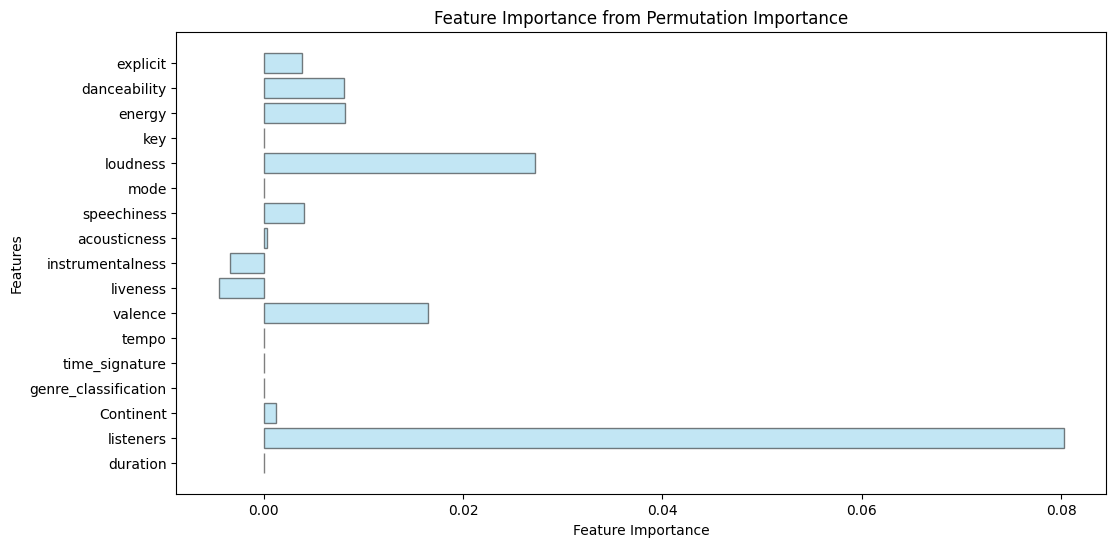

In [ ]:
features = list(feature_imp_results.keys())
importances = list(feature_imp_results.values())

plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='skyblue', edgecolor='black', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

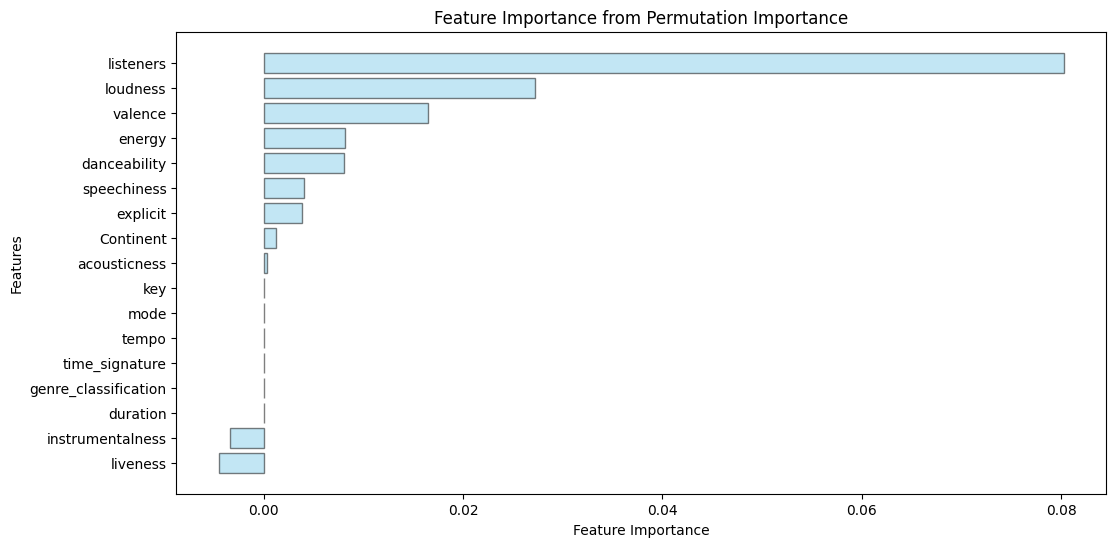

In [ ]:
# Sort features and importances in descending order
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Plot the sorted features
plt.figure(figsize=(12, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue', edgecolor='black', alpha=0.5)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': idx})
features_df

,Feature,Importance
0,explicit,0.003832
1,danceability,0.008029
2,energy,0.008212
3,key,0.000000
4,loudness,0.027311
5,mode,0.000000
6,speechiness,0.004015
7,acousticness,0.000365
8,instrumentalness,-0.003406
9,liveness,-0.004501


In [ ]:
positive_corr_features = (features_df[features_df['Importance'] > 0]).sort_values(by=['Importance'], ascending=False)
positive_corr_features

,Feature,Importance
15,listeners,0.080231
4,loudness,0.027311
10,valence,0.016363
2,energy,0.008212
1,danceability,0.008029
6,speechiness,0.004015
0,explicit,0.003832
14,Continent,0.001217
7,acousticness,0.000365


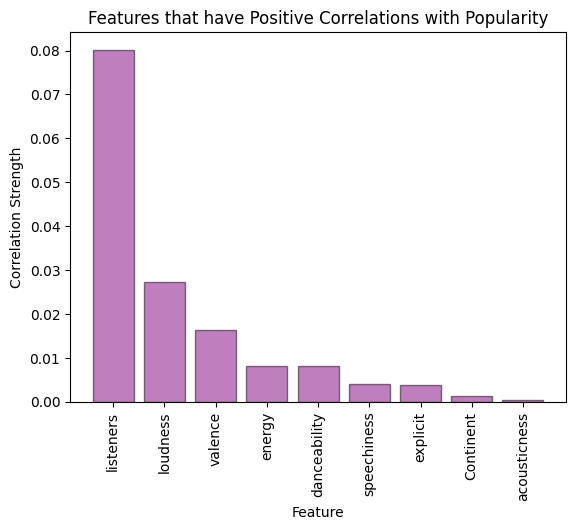

In [ ]:
plt.bar(x=positive_corr_features['Feature'], height=positive_corr_features['Importance'], color='purple', edgecolor='black', alpha=0.5)
plt.xlabel("Feature")
plt.ylabel("Correlation Strength")
plt.title("Features that have Positive Correlations with Popularity")
plt.xticks(rotation=90)
plt.show()

In [ ]:
coefficients = best_model.coef_[0]
features = X.columns

In [ ]:
feature_weight_df = pd.DataFrame({
    'Feature': features,
    'Weight': coefficients
}).sort_values(by='Weight', ascending=False)
feature_weight_df

,Feature,Weight
15,listeners,1.374987
1,danceability,0.454850
4,loudness,0.442591
0,explicit,0.079943
14,Continent,0.005055
3,key,0.000000
5,mode,0.000000
11,tempo,0.000000
12,time_signature,0.000000
13,genre_classification,0.000000


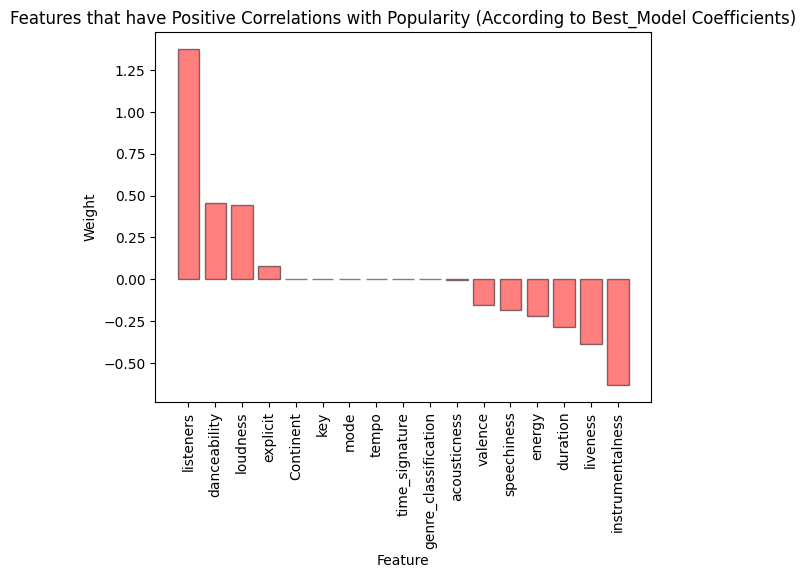

In [ ]:
plt.bar(x=feature_weight_df['Feature'], height=feature_weight_df['Weight'], color='red', edgecolor='black', alpha=0.5)
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.title("Features that have Positive Correlations with Popularity (According to Best_Model Coefficients)")
plt.xticks(rotation=90)
plt.show()

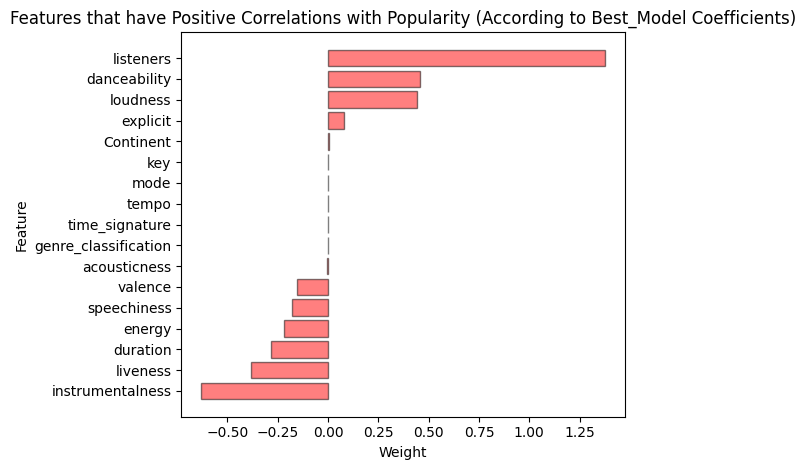

In [ ]:
plt.barh(y=feature_weight_df['Feature'], width=feature_weight_df['Weight'], color='red', edgecolor='black', alpha=0.5)
plt.ylabel("Feature")
plt.xlabel("Weight")
plt.title("Features that have Positive Correlations with Popularity (According to Best_Model Coefficients)")
plt.gca().invert_yaxis() # get in descending order
plt.tight_layout()
plt.show()

## Apply clustering techniques

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df12_new.columns

Index(['artists', 'album_name', 'track_name', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'country', 'genre_classification', 'Continent',
       'listeners', 'popularity', 'duration', 'is_popular'],
      dtype='object')

In [ ]:
df12_new.head(2)

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.672,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.134,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0


In [ ]:
len(X_train[0]) # currently have 17 cols

17

In [ ]:
genremap

{'Movies & Children': 0,
 'Traditional & Regional': 1,
 'Classical & Art Music': 2,
 'Miscellaneous': 3,
 'Country & Folk': 4,
 'Mood-based Music': 5,
 'Soul & R&B': 6,
 'Hip-Hop & Reggae': 7,
 'Pop': 8,
 'Electronic': 9,
 'Dance & Party': 10,
 'Rock': 11}

In [ ]:
number_to_genre = {v: k for k, v in genremap.items()}
number_to_genre

{0: 'Movies & Children',
 1: 'Traditional & Regional',
 2: 'Classical & Art Music',
 3: 'Miscellaneous',
 4: 'Country & Folk',
 5: 'Mood-based Music',
 6: 'Soul & R&B',
 7: 'Hip-Hop & Reggae',
 8: 'Pop',
 9: 'Electronic',
 10: 'Dance & Party',
 11: 'Rock'}

In [ ]:
genre_popularity_stats = df12_new.groupby('genre_classification')['popularity'].describe()
genre_popularity_stats

,count,mean,std,min,25%,50%,75%,max
genre_classification,,,,,,,,
0,236.0,37.550847,18.118568,0.0,24.0,29.0,57.0,75.0
1,1344.0,39.600446,16.692534,0.0,33.0,40.0,48.0,98.0
2,220.0,37.818182,18.366478,0.0,23.0,32.0,52.0,96.0
3,652.0,31.955521,17.903896,0.0,18.0,23.0,49.0,77.0
4,472.0,37.737288,23.496010,0.0,22.0,37.0,55.0,90.0
5,159.0,38.515723,21.465266,0.0,19.0,33.0,58.5,93.0
6,275.0,49.276364,23.259799,0.0,38.0,54.0,68.0,85.0
7,155.0,41.322581,24.322491,0.0,20.0,44.0,62.0,89.0
8,840.0,46.590476,22.523597,0.0,26.0,49.0,65.0,95.0


In [ ]:
type(genre_popularity_stats)

pandas.core.frame.DataFrame

In [ ]:
genre_popularity_stats = genre_popularity_stats.reset_index().sort_values(by='mean', ascending=False).reset_index(drop=True)
genre_popularity_stats['genre'] = genre_popularity_stats['genre_classification'].map(number_to_genre)
genre_popularity_stats

,genre_classification,count,mean,std,min,25%,50%,75%,max,genre
0,6,275.0,49.276364,23.259799,0.0,38.0,54.0,68.0,85.0,Soul & R&B
1,8,840.0,46.590476,22.523597,0.0,26.0,49.0,65.0,95.0,Pop
2,11,1802.0,44.193674,19.075632,0.0,29.0,42.0,59.0,93.0,Rock
3,7,155.0,41.322581,24.322491,0.0,20.0,44.0,62.0,89.0,Hip-Hop & Reggae
4,10,599.0,41.078464,19.422486,0.0,28.0,36.0,57.0,84.0,Dance & Party
5,1,1344.0,39.600446,16.692534,0.0,33.0,40.0,48.0,98.0,Traditional & Regional
6,9,1466.0,38.920191,20.436427,0.0,22.0,39.0,55.0,96.0,Electronic
7,5,159.0,38.515723,21.465266,0.0,19.0,33.0,58.5,93.0,Mood-based Music
8,2,220.0,37.818182,18.366478,0.0,23.0,32.0,52.0,96.0,Classical & Art Music
9,4,472.0,37.737288,23.496010,0.0,22.0,37.0,55.0,90.0,Country & Folk


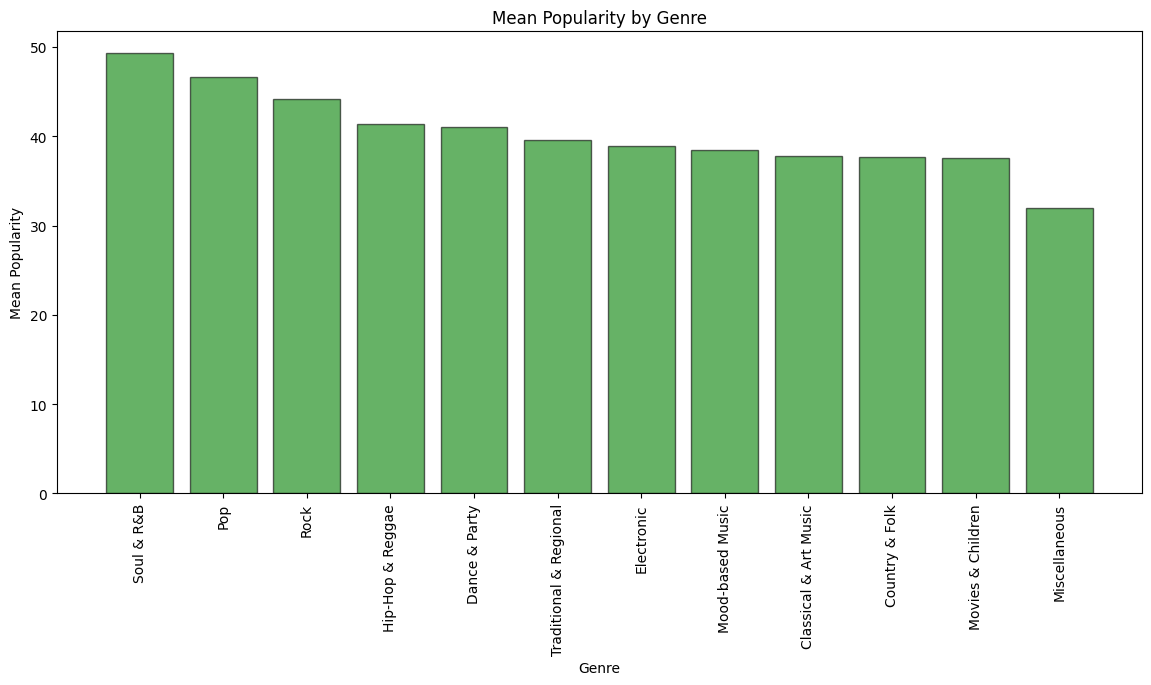

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(
    x=genre_popularity_stats['genre'],
    height=genre_popularity_stats['mean'],
    color='green',
    edgecolor='black',
    alpha=0.6)
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Genre')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# popularity>70
# groupby particular attribute (genre/continent/explicit) to find attribute patterns
# average, sort, visualize

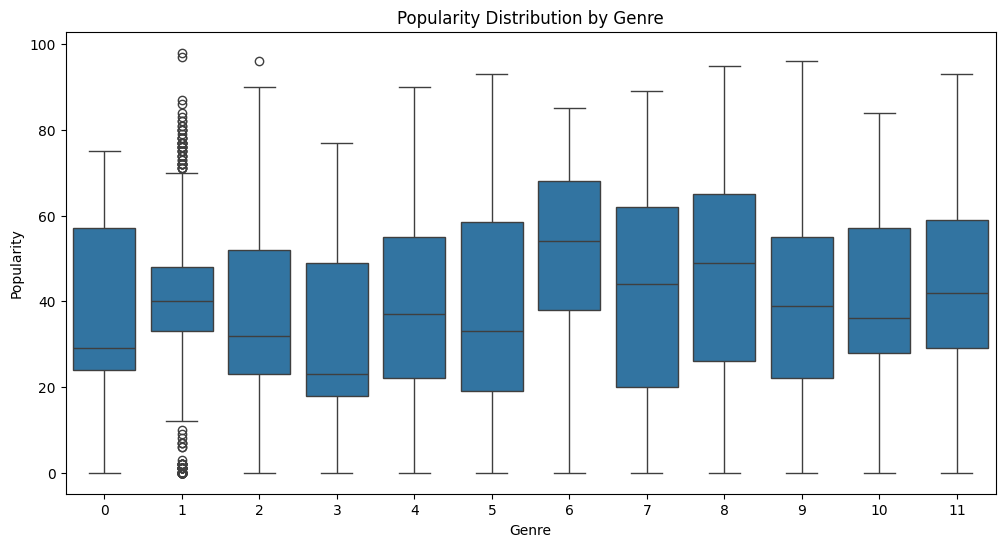

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_classification', y='popularity', data=df12_new)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

In [ ]:
# clustering
X = df12_new[['genre_classification', 'popularity']]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42) # You can experiment with different values

df12_new['genre_cluster'] = kmeans.fit_predict(X)
df12_new.head()

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular,genre_cluster
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.6720,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0,0
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.1340,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0,1
2,黃仲崑,經典復刻21黃仲崑,牽掛,False,0.464,0.512,4,-8.662,1,0.0282,0.5090,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,8,3,90.0,27,2.704883,0,1
3,須田景凪,porte,veil,False,0.559,0.873,0,-4.401,0,0.0543,0.0281,0.000000,0.1850,0.797,150.055,4,j-pop,Japan,8,3,86.0,63,3.493933,0,0
4,陶晶瑩,愛缺,太委屈,False,0.664,0.420,11,-9.589,1,0.0269,0.7860,0.000000,0.1220,0.319,110.042,4,mandopop,Taiwan,8,3,1981.0,54,4.855100,0,2


In [ ]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 7.46464646 66.12867809]
 [ 6.56920474 19.56548223]
 [ 6.1830656  42.56258367]]


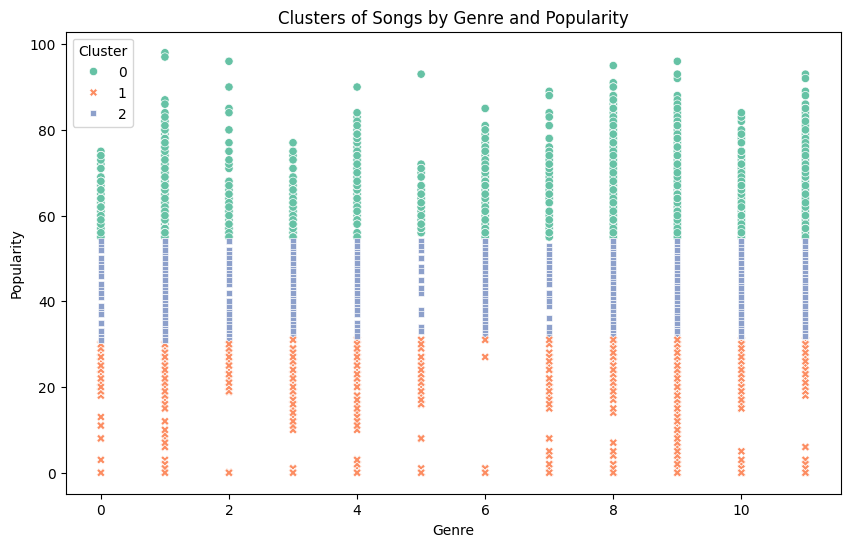

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df12_new['genre_classification'], y=df12_new['popularity'], hue=df12_new['genre_cluster'], palette='Set2', style=df12_new['genre_cluster'])
plt.title('Clusters of Songs by Genre and Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.legend(title='Cluster')
plt.show()

### UMAP for dimensionality Reduction

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import umap # use 'pip install umap-learn' or 'conda install -c conda-forge umap-learn'
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import plotly.graph_objs as go
import plotly.figure_factory as ff

Research Question:<br>
2.3.2	Get Similar Artists and Determine How to Position them in the Market <br>
-	Apply clustering techniques (K-Means, DBSCAN) to find similar artists  to find the feasible market positioning for independent artists.
- Market positioning: means that new/independent artists could find their niche based on similarity to existing artists who are successful

In [ ]:
df12_new.head(3)

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular,genre_cluster
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.672,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0,0
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.134,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0,1
2,黃仲崑,經典復刻21黃仲崑,牽掛,False,0.464,0.512,4,-8.662,1,0.0282,0.509,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,8,3,90.0,27,2.704883,0,1


In [ ]:
X = df12_new.drop(columns=['artists','album_name',	'track_name', 'track_genre','country','genre_cluster'])
X.head(3)

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_classification,Continent,listeners,popularity,duration,is_popular
0,False,0.334,0.431,6,-5.861,1,0.0347,0.672,0.000000,0.1010,0.212,201.701,3,8,3,4051.0,56,5.168883,0
1,False,0.551,0.849,4,-1.784,0,0.0302,0.134,0.000043,0.0597,0.739,124.957,4,8,3,318.0,25,2.598217,0
2,False,0.464,0.512,4,-8.662,1,0.0282,0.509,0.000063,0.4890,0.336,77.184,4,8,3,90.0,27,2.704883,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components = 2, n_neighbors=15, min_dist=0.4,random_state=42)
x_umap = u.fit_transform(X_scaled)

artists_names=list(df12_new['artists'])
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                                text=[f'Artist: {a}' for a in artists_names],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

### K-Means

In [ ]:
wcss = [] # within-cluster sum of squares
for i in range(1, 8):  # choose a logical range of possible k e.g. 1 to 10 in this df
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_umap)
    wcss.append(kmeans.inertia_) # inertia = wcss. more compact cluster=smaller inertia
    print(f"k: {i} | wcss: {kmeans.inertia_}")

k: 1 | wcss: 408103.75
k: 2 | wcss: 242129.3125
k: 3 | wcss: 160086.234375
k: 4 | wcss: 76206.1640625
k: 5 | wcss: 48024.97265625
k: 6 | wcss: 38017.890625
k: 7 | wcss: 34059.17578125


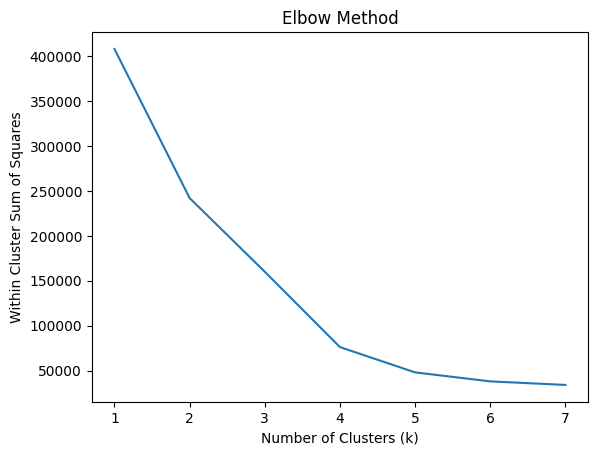

In [ ]:
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Labelling clusters using KMeans
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(x_umap)

labels = list(kmeans.labels_) # cluster assignments
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Cluster: {a}<br>Label: {b}' for a,b in list(zip(artists_names,labels))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
df12_kmeans = df12_new.drop(columns='genre_cluster')
df12_kmeans['kmeans cluster'] = kmeans.labels_
df12_kmeans.head(3)

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular,kmeans cluster
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.672,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0,3
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.134,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0,3
2,黃仲崑,經典復刻21黃仲崑,牽掛,False,0.464,0.512,4,-8.662,1,0.0282,0.509,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,8,3,90.0,27,2.704883,0,0


In [ ]:
kmeans_pop = df12_kmeans.groupby('kmeans cluster')['popularity'].mean().sort_values(ascending=False).reset_index()
kmeans_pop

,kmeans cluster,popularity
0,2,76.877581
1,3,38.088743
2,0,37.581882
3,1,34.987138


In [ ]:
color_map = {0: 'maroon', 1: 'blue', 2: 'lime', 3: 'red'}
bar_colors = kmeans_pop['kmeans cluster'].map(color_map)

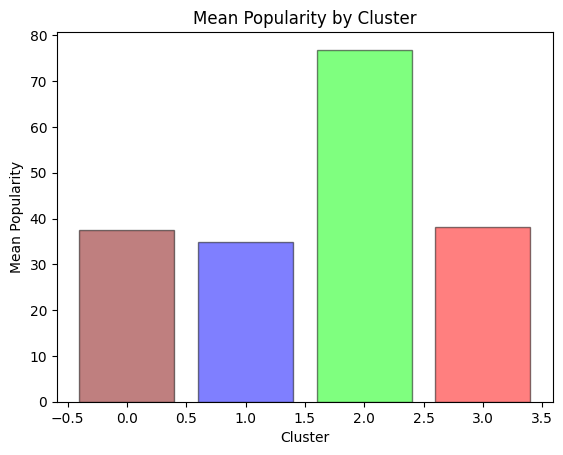

In [ ]:
plt.bar(x=kmeans_pop['kmeans cluster'], height=kmeans_pop['popularity'], color=bar_colors, edgecolor='black', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Cluster')
plt.show()

In [ ]:
kmeans_listeners = df12_kmeans.groupby('kmeans cluster')['listeners'].mean().sort_values(ascending=False).reset_index()
kmeans_listeners

,kmeans cluster,listeners
0,2,1.031348e+06
1,0,1.651453e+05
2,3,1.396341e+05
3,1,1.386853e+05


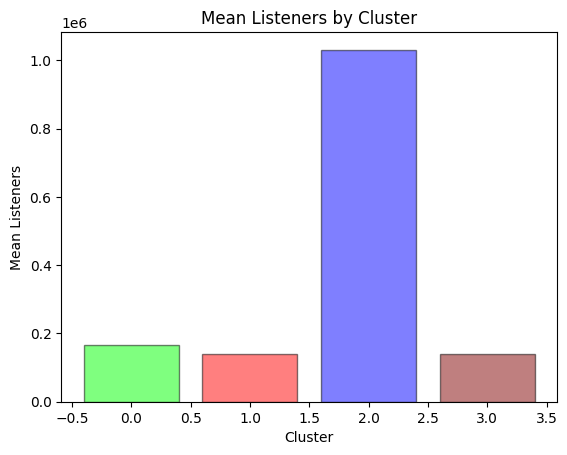

In [ ]:
plt.bar(x=kmeans_listeners['kmeans cluster'], height=kmeans_listeners['listeners'], color=['blue', 'lime', 'maroon', 'red'], edgecolor='black', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Mean Listeners')
plt.title('Mean Listeners by Cluster')
plt.show()

In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
cluster_counts = df12_kmeans['kmeans cluster'].value_counts(normalize=True)
cluster_counts

,proportion
kmeans cluster,
0,0.453893
3,0.387956
2,0.082482
1,0.075669


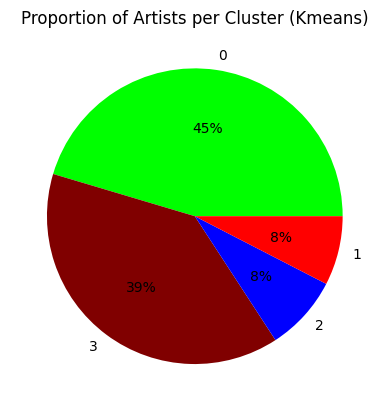

In [ ]:
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.0f%%', colors=['lime', 'maroon', 'blue', 'red'], startangle=0)
plt.title("Proportion of Artists per Cluster (Kmeans)")
plt.show()

In [ ]:
cols = ['popularity', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature',
       'listeners', 'Continent', 'is_popular',
       'genre_classification']
cols

['popularity',
 'duration',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'listeners',
 'Continent',
 'is_popular',
 'genre_classification']

In [ ]:
for i in cols:
  print(f'{i}:')
  display(df12_kmeans.groupby('kmeans cluster')[i].describe())
  print()

popularity:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,37.581882,17.862475,0.0,25.0,37.0,52.0,70.0
1,622.0,34.987138,18.086832,0.0,23.0,32.0,50.0,73.0
2,678.0,76.877581,5.093924,71.0,73.0,76.0,80.0,98.0
3,3189.0,38.088743,17.574611,0.0,25.0,39.0,53.0,70.0



duration:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,3.805892,1.311434,0.511333,3.012742,3.625267,4.376108,14.322417
1,622.0,3.460789,1.346925,0.525550,2.675975,3.312658,4.103246,10.979333
2,678.0,3.762637,0.874626,1.142033,3.225213,3.644217,4.208896,8.679767
3,3189.0,4.094361,2.218123,0.621550,3.117800,3.811933,4.620000,76.064950



explicit:


,count,unique,top,freq
kmeans cluster,,,,
0,3731,1,False,3731
1,622,2,True,546
2,678,2,False,600
3,3189,2,False,3188



danceability:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.556122,0.161789,0.0566,0.448,0.5680,0.67400,0.934
1,622.0,0.555712,0.192128,0.0000,0.432,0.5565,0.69625,0.966
2,678.0,0.597732,0.148268,0.1500,0.502,0.5960,0.70750,0.951
3,3189.0,0.535689,0.175724,0.0513,0.421,0.5450,0.66500,0.982



energy:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.664182,0.244935,0.00815,0.48700,0.7030,0.87600,1.000
1,622.0,0.748615,0.221073,0.00066,0.60925,0.8005,0.94300,1.000
2,678.0,0.677645,0.193847,0.04000,0.53525,0.7110,0.83775,0.986
3,3189.0,0.672897,0.252576,0.00181,0.49700,0.7290,0.89400,0.999



key:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,4.917448,3.494560,0.0,2.0,5.0,8.0,11.0
1,622.0,5.308682,3.501261,0.0,2.0,5.0,8.0,11.0
2,678.0,5.253687,3.485858,0.0,2.0,5.0,8.0,11.0
3,3189.0,5.603638,3.532028,0.0,2.0,6.0,9.0,11.0



loudness:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,-8.173219,4.231870,-32.190,-10.13600,-7.2840,-5.22400,1.028
1,622.0,-7.373432,4.379063,-35.120,-8.88350,-6.3025,-4.48600,-1.115
2,678.0,-7.118260,3.210185,-22.390,-8.91375,-6.4880,-4.87975,-1.399
3,3189.0,-8.155748,4.786352,-43.957,-10.15400,-7.1520,-4.97400,4.532



mode:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.993835,0.078283,0.0,1.0,1.0,1.0,1.0
1,622.0,0.593248,0.491623,0.0,0.0,1.0,1.0,1.0
2,678.0,0.634218,0.482004,0.0,0.0,1.0,1.0,1.0
3,3189.0,0.202258,0.401746,0.0,0.0,0.0,0.0,1.0



speechiness:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.070070,0.068449,0.0230,0.034150,0.0449,0.07295,0.727
1,622.0,0.242156,0.280692,0.0000,0.060625,0.1155,0.29300,0.961
2,678.0,0.067167,0.067653,0.0239,0.034100,0.0439,0.06845,0.724
3,3189.0,0.071818,0.069179,0.0228,0.035700,0.0480,0.07650,0.889



acousticness:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.286336,0.319584,0.000000,0.009075,0.1330,0.54600,0.996
1,622.0,0.257425,0.324278,0.000001,0.001573,0.0801,0.47925,0.994
2,678.0,0.217455,0.251062,0.000005,0.012950,0.1045,0.34200,0.991
3,3189.0,0.264444,0.326653,0.000000,0.004130,0.0784,0.49600,0.996



instrumentalness:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.170229,0.314147,0.0,0.000000,0.000126,0.122500,0.988
1,622.0,0.111965,0.263421,0.0,0.000000,0.000005,0.007112,0.973
2,678.0,0.040200,0.155112,0.0,0.000000,0.000011,0.000967,0.982
3,3189.0,0.233515,0.354974,0.0,0.000002,0.001300,0.511000,0.987



liveness:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.209331,0.182164,0.0145,0.09665,0.132,0.27600,0.988
1,622.0,0.293003,0.252479,0.0116,0.10400,0.182,0.37675,0.984
2,678.0,0.166392,0.124846,0.0222,0.08740,0.119,0.20300,0.839
3,3189.0,0.195017,0.157086,0.0176,0.09540,0.129,0.26400,0.982



valence:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.518837,0.268069,0.00785,0.29550,0.5200,0.74500,0.992
1,622.0,0.438528,0.250341,0.00000,0.23925,0.4245,0.61475,0.980
2,678.0,0.546752,0.239838,0.03640,0.36175,0.5435,0.74525,0.979
3,3189.0,0.461092,0.264347,0.02350,0.23500,0.4430,0.67700,0.984



tempo:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,123.655553,29.620073,42.186,100.27550,123.136,140.25750,215.149
1,622.0,120.119854,32.370746,0.000,94.87625,117.925,142.04925,217.282
2,678.0,121.222416,28.234104,48.718,100.00525,118.718,139.87650,206.247
3,3189.0,124.985170,29.993485,54.669,101.61200,123.905,144.20300,215.513



time_signature:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,4.013401,0.140212,3.0,4.0,4.0,4.0,5.0
1,622.0,3.667203,0.906330,0.0,4.0,4.0,4.0,5.0
2,678.0,3.957227,0.229827,3.0,4.0,4.0,4.0,5.0
3,3189.0,3.844152,0.386221,3.0,4.0,4.0,4.0,5.0



listeners:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,1.651453e+05,303738.595135,0.0,12712.5,52966.0,170276.00,3820581.0
1,622.0,1.386853e+05,291743.283890,0.0,6033.5,27855.5,114928.25,2485167.0
2,678.0,1.031348e+06,979932.780135,0.0,199710.0,759783.5,1606147.25,5381567.0
3,3189.0,1.396341e+05,253430.795176,0.0,9930.0,42766.0,144016.00,2495391.0



Continent:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.592603,0.816183,0.0,0.0,0.0,1.0,4.0
1,622.0,0.636656,0.976276,0.0,0.0,0.0,1.0,4.0
2,678.0,0.587021,0.940132,0.0,0.0,0.0,1.0,4.0
3,3189.0,1.099091,1.190812,0.0,0.0,1.0,1.0,4.0



is_popular:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,622.0,0.003215,0.056659,0.0,0.0,0.0,0.0,1.0
2,678.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
3,3189.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0



genre_classification:


,count,mean,std,min,25%,50%,75%,max
kmeans cluster,,,,,,,,
0,3731.0,6.667113,3.863785,0.0,3.0,8.0,10.0,11.0
1,622.0,6.081994,4.238999,0.0,1.0,8.0,10.0,11.0
2,678.0,7.721239,3.194418,0.0,6.0,8.0,11.0,11.0
3,3189.0,6.582314,3.813716,0.0,3.0,8.0,10.0,11.0


In [ ]:
cluster1 = df12_kmeans[df12_kmeans['kmeans cluster']==1]
print(f"Unique Genres: {cluster1['genre_classification'].unique()}")
print(f"Median: {cluster1['genre_classification'].median()}")
print(f"Mode: {cluster1['genre_classification'].mode()[0]}")

Unique Genres: [ 5  1 11  3  9  8 10  7  0  4  2  6]
Median: 8.0
Mode: 9


### DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=10) # (eps=0.8, min_samples=12) gave 7 groups, like islands
dbscan.fit(x_umap)

labels = list(dbscan.labels_)
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=dbscan.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Cluster: {a}<br>Label: {b}' for a,b in list(zip(artists_names,labels))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
np.unique(dbscan.labels_)

array([0, 1, 2, 3, 4, 5])

In [ ]:
df12_dbscan = df12_new.drop(columns='genre_cluster')
df12_dbscan['dbscan cluster'] = dbscan.labels_
df12_dbscan.head(3)

,artists,album_name,track_name,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,country,genre_classification,Continent,listeners,popularity,duration,is_popular,dbscan cluster
0,黃小琥,簡單不簡單,沒那麽簡單,False,0.334,0.431,6,-5.861,1,0.0347,0.672,0.000000,0.1010,0.212,201.701,3,mandopop,Taiwan,8,3,4051.0,56,5.168883,0,0
1,黃妃,非常妃,恨世生,False,0.551,0.849,4,-1.784,0,0.0302,0.134,0.000043,0.0597,0.739,124.957,4,mandopop,Taiwan,8,3,318.0,25,2.598217,0,0
2,黃仲崑,經典復刻21黃仲崑,牽掛,False,0.464,0.512,4,-8.662,1,0.0282,0.509,0.000063,0.4890,0.336,77.184,4,mandopop,Taiwan,8,3,90.0,27,2.704883,0,0


In [ ]:
dbscan_pop = df12_dbscan.groupby('dbscan cluster')['popularity'].mean().sort_values(ascending=False).reset_index()
dbscan_pop

,dbscan cluster,popularity
0,5,78.282051
1,1,76.695000
2,0,37.815462
3,2,36.693878
4,3,36.621677
5,4,24.476190


In [ ]:
colors = ['maroon', 'blue', 'lime', 'yellow', 'red'] # 0, 1, 2, 3, 4
#bar_colors = dbscan_pop['dbscan cluster'].map(color_map)

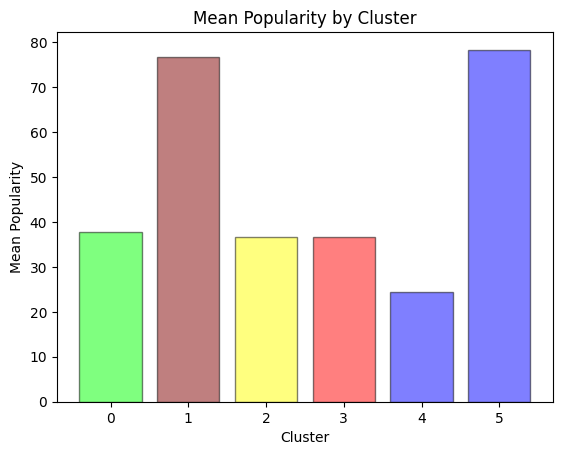

In [ ]:
plt.bar(x=dbscan_pop['dbscan cluster'], height=dbscan_pop['popularity'], color=['blue', 'maroon', 'lime', 'yellow', 'red'], edgecolor='black', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Cluster')
plt.show()

In [ ]:
dbscan_listeners = df12_dbscan.groupby('dbscan cluster')['listeners'].mean().sort_values(ascending=False).reset_index()
dbscan_listeners

,dbscan cluster,listeners
0,5,1.203707e+06
1,1,1.008941e+06
2,3,1.582780e+05
3,0,1.533888e+05
4,2,1.400423e+05
5,4,2.383621e+04


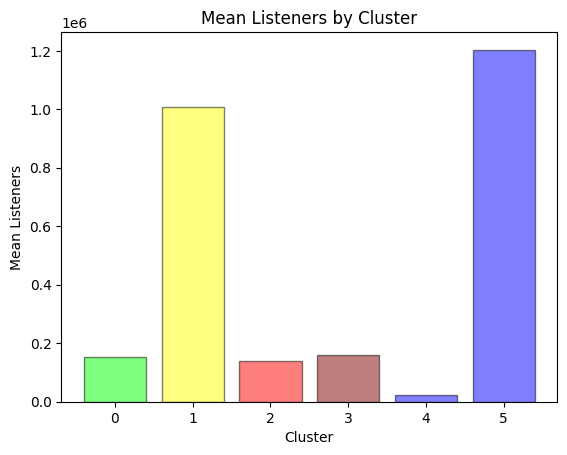

In [ ]:
plt.bar(x=dbscan_listeners['dbscan cluster'], height=dbscan_listeners['listeners'], color=['blue', 'yellow', 'maroon', 'lime', 'red'], edgecolor='black', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Mean Listeners')
plt.title('Mean Listeners by Cluster')
plt.show()

In [ ]:
cluster_counts_db = df12_dbscan['dbscan cluster'].value_counts(normalize=True)
cluster_counts_db

,proportion
dbscan cluster,
0,0.841849
1,0.072993
3,0.059489
4,0.010219
5,0.009489
2,0.005961


([<matplotlib.patches.Wedge at 0x79e8fa86ef50>,
 [Text(-0.9669995666980106, 0.5243203581836775, '0'),
  Text(0.7939944363052746, -0.7612968114449643, '1'),
  Text(1.1279966952211404, -0.40941843579666276, '3'),
  Text(1.190001454633938, -0.15458505092379463, '4'),
  Text(1.1972862545656955, -0.08065745240242156, '5'),
  Text(1.199789579813433, -0.022471407857678045, '2')],
 [Text(-0.5274543091080057, 0.28599292264564224, '84%'),
  Text(0.4330878743483315, -0.4152528062427078, '7%'),
  Text(0.6579980722123318, -0.23882742088138662, '6%'),
  Text(0.6941675152031304, -0.09017461303888019, '1%'),
  Text(0.6984169818299889, -0.04705018056807923, '1%'),
  Text(0.6998772548911691, -0.013108321250312192, '1%')])

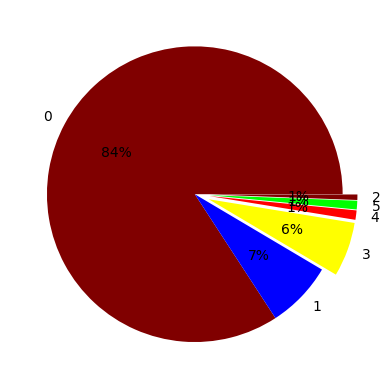

In [ ]:
explode = [0.1 if val < 0.06 else 0 for val in cluster_counts_db]

# Create the pie chart
plt.pie(
    cluster_counts_db,
    labels=cluster_counts_db.index,
    autopct='%1.0f%%',
    colors=['maroon', 'blue', 'yellow', 'red', 'lime'],
    startangle=0,
    explode=explode  # Apply the explode
)

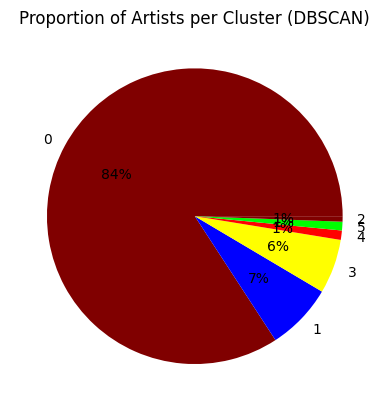

In [ ]:
plt.pie(cluster_counts_db, labels=cluster_counts_db.index, autopct='%1.0f%%', colors=['maroon', 'blue', 'yellow', 'red', 'lime'], startangle=0)
plt.title("Proportion of Artists per Cluster (DBSCAN)")
plt.show()

In [ ]:
cols = ['popularity', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature',
       'listeners', 'Continent', 'is_popular',
       'genre_classification']
cols

['popularity',
 'duration',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'listeners',
 'Continent',
 'is_popular',
 'genre_classification']

In [ ]:
for i in cols:
  print(f'{i}:')
  display(df12_dbscan.groupby('dbscan cluster')[i].describe())
  print()

popularity:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,37.815462,17.730920,0.0,25.0,38.0,52.0,70.0
1,600.0,76.695000,4.934155,71.0,73.0,76.0,80.0,98.0
2,49.0,36.693878,20.614724,0.0,19.0,39.0,54.0,73.0
3,489.0,36.621677,18.705823,0.0,24.0,35.0,52.0,70.0
4,84.0,24.476190,3.906979,19.0,22.0,24.0,27.0,39.0
5,78.0,78.282051,6.040765,71.0,74.0,76.0,81.0,96.0



duration:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,3.938829,1.792992,0.511333,3.057021,3.706667,4.482783,76.064950
1,600.0,3.774957,0.881580,1.142033,3.228750,3.653133,4.212217,8.679767
2,49.0,3.619798,1.920995,0.525550,2.191333,3.335417,4.301767,9.844433
3,489.0,3.485359,1.222797,0.794567,2.821550,3.343333,4.035317,10.979333
4,84.0,3.225004,1.604271,0.549767,2.059100,3.029925,4.357517,8.173333
5,78.0,3.667866,0.818301,2.184400,3.203883,3.595825,4.030550,5.908667



explicit:


,count,unique,top,freq
dbscan cluster,,,,
0,6920,2,False,6919
1,600,1,False,600
2,49,2,False,45
3,489,1,True,489
4,84,2,True,53
5,78,1,True,78



danceability:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.546706,0.168649,0.0513,0.43600,0.5590,0.67100,0.982
1,600.0,0.588152,0.142914,0.1740,0.49950,0.5895,0.68825,0.951
2,49.0,0.385878,0.188637,0.0000,0.22500,0.4020,0.48400,0.757
3,489.0,0.573753,0.197192,0.1270,0.43200,0.5770,0.73100,0.966
4,84.0,0.549762,0.089446,0.2520,0.49925,0.5575,0.62025,0.719
5,78.0,0.671423,0.167871,0.1500,0.57400,0.7000,0.80025,0.950



energy:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.668198,0.248505,0.00181,0.4920,0.7160,0.88400,1.000
1,600.0,0.674713,0.196993,0.04000,0.5280,0.7095,0.83800,0.986
2,49.0,0.440440,0.351760,0.00066,0.1160,0.4330,0.72700,0.998
3,489.0,0.783147,0.181562,0.24300,0.6470,0.8260,0.95000,1.000
4,84.0,0.727357,0.191679,0.33000,0.5850,0.7620,0.89600,0.994
5,78.0,0.700205,0.167077,0.22500,0.5845,0.7325,0.83375,0.950



key:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,5.233671,3.528243,0.0,2.00,5.0,8.00,11.0
1,600.0,5.260000,3.504216,0.0,2.00,5.0,8.00,11.0
2,49.0,5.653061,3.326353,0.0,3.00,6.0,8.00,11.0
3,489.0,5.388548,3.579935,0.0,2.00,5.0,9.00,11.0
4,84.0,4.642857,3.068074,0.0,2.00,4.0,6.25,11.0
5,78.0,5.205128,3.362741,0.0,2.25,5.5,8.00,11.0



loudness:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,-8.165167,4.495577,-43.957,-10.14725,-7.2280,-5.12800,4.532
1,600.0,-7.227792,3.276513,-22.390,-9.08150,-6.5435,-4.94275,-1.399
2,49.0,-13.472714,7.566973,-35.120,-19.22100,-11.1760,-7.43200,-3.373
3,489.0,-6.085928,2.553111,-13.958,-7.86100,-5.7150,-4.21300,-1.115
4,84.0,-11.310631,4.961812,-22.709,-14.53200,-11.0385,-6.75000,-2.660
5,78.0,-6.275705,2.505893,-13.964,-7.97625,-5.9900,-4.11075,-2.052



mode:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.629046,0.483095,0.0,0.00,1.0,1.0,1.0
1,600.0,0.638333,0.480884,0.0,0.00,1.0,1.0,1.0
2,49.0,0.632653,0.487078,0.0,0.00,1.0,1.0,1.0
3,489.0,0.562372,0.496602,0.0,0.00,1.0,1.0,1.0
4,84.0,0.750000,0.435613,0.0,0.75,1.0,1.0,1.0
5,78.0,0.602564,0.492535,0.0,0.00,1.0,1.0,1.0



speechiness:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.070875,0.068787,0.0228,0.034800,0.04610,0.074400,0.889
1,600.0,0.059612,0.052063,0.0239,0.033375,0.04205,0.062325,0.463
2,49.0,0.064516,0.063855,0.0000,0.035600,0.04280,0.057200,0.353
3,489.0,0.147502,0.113600,0.0242,0.061300,0.10700,0.211000,0.610
4,84.0,0.896798,0.078224,0.5240,0.885500,0.92200,0.937250,0.961
5,78.0,0.125286,0.123649,0.0255,0.042700,0.07130,0.140750,0.724



acousticness:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.276248,0.323022,0.000000,0.006457,0.1060,0.52525,0.996
1,600.0,0.223998,0.254943,0.000005,0.015775,0.1185,0.35650,0.991
2,49.0,0.587707,0.402993,0.000001,0.045900,0.7540,0.94800,0.994
3,489.0,0.132977,0.198802,0.000001,0.000662,0.0247,0.19200,0.897
4,84.0,0.789226,0.136429,0.134000,0.745500,0.8160,0.87050,0.985
5,78.0,0.167124,0.213715,0.000022,0.008398,0.0558,0.30675,0.768



instrumentalness:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.199393,0.335047,0.0,0.000000,0.000353,0.284000,0.988000
1,600.0,0.042374,0.160968,0.0,0.000000,0.000011,0.001172,0.982000
2,49.0,0.375763,0.415782,0.0,0.000017,0.065200,0.871000,0.973000
3,489.0,0.104760,0.249203,0.0,0.000000,0.000014,0.013500,0.965000
4,84.0,0.000027,0.000129,0.0,0.000000,0.000000,0.000000,0.000869
5,78.0,0.023477,0.098252,0.0,0.000000,0.000005,0.000289,0.695000



liveness:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.202735,0.171201,0.0145,0.095900,0.130,0.2710,0.988
1,600.0,0.163698,0.121294,0.0222,0.086475,0.119,0.1985,0.839
2,49.0,0.214131,0.177490,0.0116,0.100000,0.114,0.3090,0.713
3,489.0,0.221827,0.171984,0.0197,0.100000,0.154,0.3200,0.983
4,84.0,0.753361,0.191867,0.0803,0.658000,0.777,0.9205,0.984
5,78.0,0.187115,0.148656,0.0327,0.093800,0.128,0.2475,0.776



valence:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.492226,0.267892,0.00785,0.26600,0.4870,0.71500,0.992
1,600.0,0.545554,0.240722,0.03640,0.37000,0.5415,0.74375,0.979
2,49.0,0.331912,0.289976,0.00000,0.10000,0.2290,0.59400,0.980
3,489.0,0.453745,0.249701,0.02150,0.25300,0.4360,0.63100,0.974
4,84.0,0.412133,0.211888,0.03510,0.25450,0.3910,0.56200,0.873
5,78.0,0.555967,0.234240,0.06840,0.35625,0.5900,0.74900,0.966



tempo:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,124.268291,29.797952,42.186,100.98875,123.5645,142.03625,215.513
1,600.0,121.726918,28.501144,48.718,100.24675,119.9235,139.90225,206.247
2,49.0,111.880388,39.046228,0.000,86.11600,109.6050,139.43800,217.282
3,489.0,124.532164,30.531905,64.086,98.01500,122.0200,146.93600,213.778
4,84.0,99.240262,29.689923,55.346,78.66150,91.3460,115.58075,180.710
5,78.0,117.341628,25.931031,71.912,94.71675,115.0500,135.76700,184.981



time_signature:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,3.935405,0.294018,3.0,4.0,4.0,4.0,5.0
1,600.0,3.951667,0.236835,3.0,4.0,4.0,4.0,5.0
2,49.0,0.959184,0.199915,0.0,1.0,1.0,1.0,1.0
3,489.0,3.975460,0.229511,3.0,4.0,4.0,4.0,5.0
4,84.0,3.452381,0.936602,1.0,3.0,3.5,4.0,5.0
5,78.0,4.000000,0.161165,3.0,4.0,4.0,4.0,5.0



listeners:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,1.533888e+05,2.819405e+05,0.0,11554.25,47126.0,157318.25,3820581.0
1,600.0,1.008941e+06,9.530238e+05,0.0,207104.00,745786.5,1554844.75,5381567.0
2,49.0,1.400423e+05,1.955024e+05,333.0,14348.00,51050.0,205405.00,918197.0
3,489.0,1.582780e+05,3.189993e+05,0.0,7105.00,30223.0,142649.00,2485167.0
4,84.0,2.383621e+04,2.827127e+04,74.0,2513.50,10997.0,37635.50,114167.0
5,78.0,1.203707e+06,1.159034e+06,0.0,134585.00,932275.0,2029731.50,4732528.0



Continent:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.826012,1.037421,0.0,0.0,1.0,1.0,4.0
1,600.0,0.631667,0.975149,0.0,0.0,0.0,1.0,4.0
2,49.0,0.693878,0.983279,0.0,0.0,0.0,1.0,4.0
3,489.0,0.709611,1.012994,0.0,0.0,0.0,1.0,4.0
4,84.0,0.178571,0.541322,0.0,0.0,0.0,0.0,4.0
5,78.0,0.243590,0.488462,0.0,0.0,0.0,0.0,2.0



is_popular:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,600.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,49.0,0.040816,0.199915,0.0,0.0,0.0,0.0,1.0
3,489.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,84.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,78.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0



genre_classification:


,count,mean,std,min,25%,50%,75%,max
dbscan cluster,,,,,,,,
0,6920.0,6.628035,3.840748,0.0,3.0,8.0,10.0,11.0
1,600.0,7.676667,3.192561,0.0,6.0,8.0,11.0,11.0
2,49.0,5.285714,3.446012,0.0,3.0,5.0,9.0,11.0
3,489.0,7.200409,3.752693,0.0,3.0,9.0,11.0,11.0
4,84.0,0.035714,0.186691,0.0,0.0,0.0,0.0,1.0
5,78.0,8.064103,3.208510,0.0,7.0,9.0,11.0,11.0
